In [1]:
from nba_api.live.nba.endpoints import scoreboard

# Today's Score Board
games = scoreboard.ScoreBoard()

# json
games.get_json()

# dictionary
games.get_dict()

{'meta': {'version': 1,
  'request': 'https://nba-prod-us-east-1-mediaops-stats.s3.amazonaws.com/NBA/liveData/scoreboard/todaysScoreboard_00.json',
  'time': '2023-10-28 05:27:11.2711',
  'code': 200},
 'scoreboard': {'gameDate': '2023-10-27',
  'leagueId': '00',
  'leagueName': 'National Basketball Association',
  'games': [{'gameId': '0022300077',
    'gameCode': '20231027/DETCHA',
    'gameStatus': 3,
    'gameStatusText': 'Final',
    'period': 4,
    'gameClock': '',
    'gameTimeUTC': '2023-10-27T23:00:00Z',
    'gameEt': '2023-10-27T19:00:00Z',
    'regulationPeriods': 4,
    'ifNecessary': False,
    'seriesGameNumber': '',
    'seriesText': '',
    'seriesConference': '',
    'poRoundDesc': '',
    'gameSubtype': '',
    'homeTeam': {'teamId': 1610612766,
     'teamName': 'Hornets',
     'teamCity': 'Charlotte',
     'teamTricode': 'CHA',
     'wins': 1,
     'losses': 1,
     'score': 99,
     'seed': None,
     'inBonus': None,
     'timeoutsRemaining': 0,
     'periods': [{

In [2]:
from nba_api.stats.static import teams 
from nba_api.stats.endpoints import leaguegamefinder 
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

teams = teams.get_teams()
#print(teams)

# Set the option to display all columns
pd.set_option('display.max_columns', None)

all_games = leaguegamefinder.LeagueGameFinder().get_data_frames()[0]
#filter data for just the start_date = pd.to_datetime('1979-10-01') end_date = pd.to_datetime('2024-06-30')
#all_games = all_games[all_games.GAME_DATE <= '2023-06-30']
all_games = all_games[all_games.GAME_DATE >= '1979-10-01']
#print(all_games.head())

#get unique team IDs and team names and year in the same frame
team_ids = all_games[['TEAM_ID', 'TEAM_NAME']].drop_duplicates().sort_values('TEAM_ID').reset_index(drop=True)
#print(team_ids)

# List of current NBA team IDs using the team_ids dataframe
#current_teams = team_ids['TEAM_ID'].tolist()
current_teams = [1610612739, 1610612737, 1610612738, 1610612740, 1610612741, 1610612742, 1610612743, 1610612744, 1610612745, 1610612746, 1610612747, 1610612748, 1610612749, 1610612750, 1610612751, 1610612752, 1610612753, 1610612754, 1610612755, 1610612756, 1610612757, 1610612758, 1610612759, 1610612760, 1610612761, 1610612762, 1610612763, 1610612764, 1610612765, 1610612766]
#print(current_teams)

#serach for Teams to get their team id: in team_name column
#print(team_ids[team_ids['TEAM_NAME'] == 'Cleveland Cavaliers'])


# Filter the data to include only current NBA teams
data = all_games[all_games['TEAM_ID'].isin(current_teams)]

# get unique list of team_id, team_name, and season_id as a copy so we can save it to data folder
team_ids = data[['TEAM_ID', 'TEAM_NAME', 'TEAM_ABBREVIATION']].drop_duplicates().sort_values('TEAM_ID').reset_index(drop=True)
#print(team_ids)
unique_team_season_id = team_ids.to_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\team_ids.csv', index=False)

#check the team_id and season_id types
print(data['TEAM_ID'].dtype)
print(data['SEASON_ID'].dtype)


# Function to determine home or away
def home_or_away(row):
    team = row['TEAM_ABBREVIATION']
    matchup = row['MATCHUP']
    
    if team + ' @ ' in matchup:
        return 'Away'
    elif team + ' vs. ' in matchup:
        return 'Home'
    else:
        return 'Unknown'
    
data['Home_Away'] = data.apply(home_or_away, axis=1)

#fix index
data = data.reset_index(drop=True)
print(len(data))
print(data.head())
print(data.columns)

int64
object
13769
  SEASON_ID     TEAM_ID TEAM_ABBREVIATION        TEAM_NAME     GAME_ID  \
0     22023  1610612765               DET  Detroit Pistons  0022300077   
1     22023  1610612762               UTA        Utah Jazz  0022300085   
2     22023  1610612746               LAC      LA Clippers  0022300085   
3     22023  1610612741               CHI    Chicago Bulls  0022300082   
4     22023  1610612751               BKN    Brooklyn Nets  0022300084   

    GAME_DATE      MATCHUP WL  MIN  PTS  FGM  FGA  FG_PCT  FG3M  FG3A  \
0  2023-10-27    DET @ CHA  W  240  111   40   88   0.455    10    30   
1  2023-10-27  UTA vs. LAC  W  241  120   42   96   0.438    16    41   
2  2023-10-27    LAC @ UTA  L  240  118   41   77   0.532    14    35   
3  2023-10-27  CHI vs. TOR  W  264  104   37   99   0.374     8    39   
4  2023-10-27    BKN @ DAL  L  238  120   45   92   0.489    21    43   

   FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB  REB  AST  STL  BLK  TOV  PF  \
0    0.333   21   25   0

C:\Users\ghadf\AppData\Local\Temp\ipykernel_17192\2548476322.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Home_Away'] = data.apply(home_or_away, axis=1)


In [3]:
#MERGING GAME_ID's for _OPP data
# Assuming data is your original dataframe

# Splitting data into data_first and data_second
data_first = data#.iloc[::2].reset_index(drop=True)
data_second = data#.iloc[1::2].reset_index(drop=True)

# Drop unnecessary columns from data_second
columns_to_drop = ['GAME_DATE', 'MATCHUP', 'TEAM_ABBREVIATION']
data_second = data_second.drop(columns=columns_to_drop)

# Merge data_first and data_second
data = data_first.merge(data_second, on='GAME_ID', suffixes=('', '_OPP'))

# Ensure TEAM_NAME from data_first isn't the same as TEAM_NAME from data_second
data = data[data.TEAM_NAME != data.TEAM_NAME_OPP]

#***making into a 1 row per game format***
#group columns by group_id to get the first one of each group
#data = data.groupby('GAME_ID').first().reset_index()
#change WL column to show TEAM_ID for the winner and TEAM_ID_OPP for the loser
#data.loc[data['WL'] == 'W', 'WL'] = data['TEAM_ID']
#data.loc[data['WL'] == 'L', 'WL'] = data['TEAM_ID_OPP']


print(len(data))
print(data.head())


13736
  SEASON_ID     TEAM_ID TEAM_ABBREVIATION          TEAM_NAME     GAME_ID  \
1     22023  1610612765               DET    Detroit Pistons  0022300077   
2     22023  1610612766               CHA  Charlotte Hornets  0022300077   
5     22023  1610612762               UTA          Utah Jazz  0022300085   
6     22023  1610612746               LAC        LA Clippers  0022300085   
9     22023  1610612741               CHI      Chicago Bulls  0022300082   

    GAME_DATE      MATCHUP WL  MIN  PTS  FGM  FGA  FG_PCT  FG3M  FG3A  \
1  2023-10-27    DET @ CHA  W  240  111   40   88   0.455    10    30   
2  2023-10-27  CHA vs. DET  L  240   99   33   88   0.375     7    28   
5  2023-10-27  UTA vs. LAC  W  241  120   42   96   0.438    16    41   
6  2023-10-27    LAC @ UTA  L  240  118   41   77   0.532    14    35   
9  2023-10-27  CHI vs. TOR  W  264  104   37   99   0.374     8    39   

   FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB  REB  AST  STL  BLK  TOV  PF  \
1    0.333   21   25   0.

In [4]:
# Create the unique matchup ID
def create_matchup_id(matchup):
    # Split the teams based on " vs. " or " @ "
    teams = matchup.split(' vs. ') if ' vs. ' in matchup else matchup.split(' @ ')
    # Sort the teams alphabetically and concatenate
    return ''.join(sorted(teams))

data['MATCHUP_ID'] = data['MATCHUP'].apply(create_matchup_id)
#This function ensures that no matter the order, the matchup will come out like this. Example below and can be used on the unseen data as well.
#data = data[data['MATCHUP_ID'] == 'HOUPOR']

#print(data.head())
print(len(data))

#look at pts and pts_opp
print(data['PTS'])
print(data['PTS_OPP'])


13736
1        111
2         99
5        120
6        118
9        104
        ... 
27517    114
27520    110
27521    100
27525    107
27526     98
Name: PTS, Length: 13736, dtype: int64
1         99
2        111
5        118
6        120
9        103
        ... 
27517    110
27520    100
27521    110
27525     98
27526    107
Name: PTS_OPP, Length: 13736, dtype: int64


In [5]:
#data adds: playoff indicator, championship indicator, conference indicator, division indicator 

import pandas as pd

def prepare_data(df):
    # Sum the statistics by team and season_id
    sum_data = df.groupby(['TEAM_ID', 'Home_Away']).agg({
        'PTS': 'sum',
        'FGM': 'sum',
        'FGA': 'sum',
        'FG3M': 'sum',
        'FG3A': 'sum',
        'FTM': 'sum',
        'FTA': 'sum',
        'AST': 'sum',
        'OREB': 'sum',
        'TOV': 'sum',
        'STL': 'sum',
        'BLK': 'sum',
        'REB': 'sum',
        'MIN': 'sum',
        'PLUS_MINUS': 'mean'  # Mean of the PLUS_MINUS remains as is
        , 'PTS_OPP': 'sum'
        , 'FGM_OPP': 'sum'
        , 'FGA_OPP': 'sum'
        , 'FG3M_OPP': 'sum'
        , 'FG3A_OPP': 'sum'
        , 'FTM_OPP': 'sum'
        , 'FTA_OPP': 'sum'
        , 'AST_OPP': 'sum'
        , 'OREB_OPP': 'sum'
        , 'TOV_OPP': 'sum'
        , 'STL_OPP': 'sum'
        , 'BLK_OPP': 'sum'
        , 'REB_OPP': 'sum'
        , 'MIN_OPP': 'sum'
        , 'PLUS_MINUS_OPP': 'mean'  # Mean of the PLUS_MINUS remains as is
    }).reset_index()
    
    #points per minute
    sum_data['PTS_PER_MIN'] = sum_data['PTS'] / sum_data['MIN']

    # Calculate FG, FG3, and FT percentages
    sum_data['FG_PCT'] = sum_data['FGM'] / sum_data['FGA']
    sum_data['FG3_PCT'] = sum_data['FG3M'] / sum_data['FG3A']
    sum_data['FT_PCT'] = sum_data['FTM'] / sum_data['FTA']
    
    # Calculate additional stats
    sum_data['TS%'] = sum_data['PTS'] / (2 * (sum_data['FGA'] + 0.44 * sum_data['FTA']))
    sum_data['eFG%'] = (sum_data['FGM'] + 0.5 * sum_data['FG3M']) / sum_data['FGA']
    sum_data['AST%'] = (sum_data['AST'] / sum_data['FGA']) * 100
    
    # Calculate offensive possessions: https://kenpom.com/blog/the-possession/
    sum_data['Offensive_Possessions'] = (sum_data['FGA'] - sum_data['OREB']) + sum_data['TOV'] + (0.44 * sum_data['FTA'])

    # Calculate Offensive Rating (ORtg) and Player Efficiency Rating (PER)
    sum_data['ORtg'] = (sum_data['PTS'] / sum_data['Offensive_Possessions']) * 100
    # Offensive Team Rating (https://www.basketball-reference.com/about/ratings.html) = (Players Points*Total FG%) + Opponents Differential= 1/5 of possessions - Times Fouled+ FTM* FT% * OAPOW (Official Adjusted Players Offensive Withstand)

    sum_data['PER%'] = ((sum_data['PTS'] + sum_data['REB'] + sum_data['AST'] + sum_data['STL'] + sum_data['BLK'] -
                         sum_data['FGM'] - sum_data['FTM'] - sum_data['TOV']) / sum_data['Offensive_Possessions']) * 100

    #_OPP stats:
    #points per minute
    sum_data['PTS_PER_MIN_OPP'] = sum_data['PTS_OPP'] / sum_data['MIN_OPP']
    # Calculate FG, FG3, and FT percentages
    sum_data['FG_PCT_OPP'] = sum_data['FGM_OPP'] / sum_data['FGA_OPP']
    sum_data['FG3_PCT_OPP'] = sum_data['FG3M_OPP'] / sum_data['FG3A_OPP']
    sum_data['FT_PCT_OPP'] = sum_data['FTM_OPP'] / sum_data['FTA_OPP']
    
    # Calculate additional stats
    sum_data['TS%_OPP'] = sum_data['PTS_OPP'] / (2 * (sum_data['FGA_OPP'] + 0.44 * sum_data['FTA_OPP']))
    sum_data['eFG%_OPP'] = (sum_data['FGM_OPP'] + 0.5 * sum_data['FG3M_OPP']) / sum_data['FGA_OPP']
    sum_data['AST%_OPP'] = (sum_data['AST_OPP'] / sum_data['FGA_OPP']) * 100

    # Calculate Defensive possessions _OPP
    sum_data['Defensive_Possessions'] = (sum_data['FGA_OPP'] - sum_data['OREB_OPP']) + sum_data['TOV_OPP'] + (0.44 * sum_data['FTA_OPP'])

    # Calculate Defensive Rating (DRtg)
    sum_data['DRtg'] = (sum_data['PTS_OPP'] / sum_data['Defensive_Possessions']) * 100

    sum_data['DPER%'] = ((sum_data['PTS_OPP'] + sum_data['REB_OPP'] + sum_data['AST_OPP'] + sum_data['STL_OPP'] + sum_data['BLK_OPP'] -
                         sum_data['FGM_OPP'] - sum_data['FTM_OPP'] - sum_data['TOV_OPP']) / sum_data['Defensive_Possessions']) * 100
    
    #difference between team and _opp stats
    sum_data['PTS_DIFF'] = sum_data['PTS'] - sum_data['PTS_OPP']
    sum_data['PTS_PER_MIN_DIFF'] = sum_data['PTS_PER_MIN'] - sum_data['PTS_PER_MIN_OPP']
    sum_data['FG_PCT_DIFF'] = sum_data['FG_PCT_OPP'] - sum_data['FG_PCT']
    sum_data['FG3_PCT_DIFF'] = sum_data['FG3_PCT_OPP'] - sum_data['FG3_PCT']
    sum_data['FT_PCT_DIFF'] = sum_data['FT_PCT_OPP'] - sum_data['FT_PCT']
    sum_data['TS%_DIFF'] = sum_data['TS%_OPP'] - sum_data['TS%']
    sum_data['eFG%_DIFF'] = sum_data['eFG%_OPP'] - sum_data['eFG%']
    sum_data['AST%_DIFF'] = sum_data['AST%_OPP'] - sum_data['AST%']
    sum_data['ORtg_DIFF'] = sum_data['DRtg'] - sum_data['ORtg']
    sum_data['PER%_DIFF'] = sum_data['DPER%'] - sum_data['PER%']

    #drop all _opp stats
    sum_data = sum_data.drop(columns=['FG_PCT_OPP', 'FG3_PCT_OPP', 'FT_PCT_OPP', 'TS%_OPP', 'eFG%_OPP', 'AST%_OPP', 'Defensive_Possessions',
                               'DRtg', 'DPER%', 'PLUS_MINUS_OPP'])

    


    return sum_data

prepared_data = prepare_data(data)
#print(prepared_data.head())


data_drop_columns = ['PTS', 'FGM', 'FG3M', 'FTM', 'FTA', 'PTS', 'REB', 'OREB', 'FGA', 'FG3A', 'OREB', 
                                    'AST', 'TOV', 'STL', 'BLK',  'Offensive_Possessions', 'SEASON_ID'
                                    'PTS_OPP', 'FGM_OPP', 'FG3M_OPP', 'FTM_OPP', 'FTA_OPP', 'PTS_OPP', 'REB_OPP', 'OREB_OPP', 'FGA_OPP', 'FG3A_OPP', 'OREB_OPP', 
                                    'AST_OPP', 'TOV_OPP', 'STL_OPP', 'BLK_OPP',  'Defensive_Possessions', 'SEASON_ID_OPP', 'Home_Away_OPP', 'PTS_PER_MIN_OPP'] #, 'DREB'

#export the data dataset without the dropped columns
future_season_data_stats = prepared_data[[col for col in prepared_data.columns if col not in data_drop_columns]]

# export X to csv to apply averages onto future nba season data on a long short-term basis
future_season_data_stats.to_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\future_season_data_stats.csv', index=False)
print(future_season_data_stats.head())
print(len(future_season_data_stats))

      TEAM_ID Home_Away    MIN  PLUS_MINUS  MIN_OPP  PTS_PER_MIN    FG_PCT  \
0  1610612737      Away  55149   -4.878448    55209     0.458866  0.453055   
1  1610612737      Home  53678    1.307143    53849     0.477067  0.467410   
2  1610612738      Away  60117    3.280800    60108     0.461933  0.459282   
3  1610612738      Home  60598    6.464822    60792     0.470989  0.469652   
4  1610612739      Away  50764   -5.823474    50552     0.435584  0.454189   

    FG3_PCT    FT_PCT       TS%      eFG%       AST%        ORtg        PER%  \
0  0.347245  0.791245  0.557656  0.519850  26.404934  107.944172  114.965278   
1  0.359617  0.797893  0.574098  0.535914  27.886634  111.451551  119.681592   
2  0.362359  0.792621  0.570967  0.536102  27.258673  110.776914  122.105918   
3  0.366989  0.805632  0.583246  0.547006  28.684103  112.808671  124.152384   
4  0.340636  0.762114  0.550273  0.515234  26.447332  105.815042  112.514619   

   PTS_DIFF  PTS_PER_MIN_DIFF  FG_PCT_DIFF  FG3_PC

has_23_24_schedule =  False
      SEASON_ID     TEAM_ID TEAM_ABBREVIATION               TEAM_NAME  \
27520     22018  1610612763               MEM       Memphis Grizzlies   
27521     22018  1610612762               UTA               Utah Jazz   
27525     22018  1610612761               TOR         Toronto Raptors   
27526     22018  1610612756               PHX            Phoenix Suns   
27488     22018  1610612765               DET         Detroit Pistons   
...         ...         ...               ...                     ...   
6         22023  1610612746               LAC             LA Clippers   
17        22023  1610612757               POR  Portland Trail Blazers   
18        22023  1610612753               ORL           Orlando Magic   
33        22023  1610612758               SAC        Sacramento Kings   
34        22023  1610612744               GSW   Golden State Warriors   

          GAME_ID  GAME_DATE      MATCHUP WL  MIN  PTS  FGM  FGA  FG_PCT  \
27520  0021800122 2

C:\Users\ghadf\AppData\Local\Temp\ipykernel_17192\298291934.py:157: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = season_data.corr()


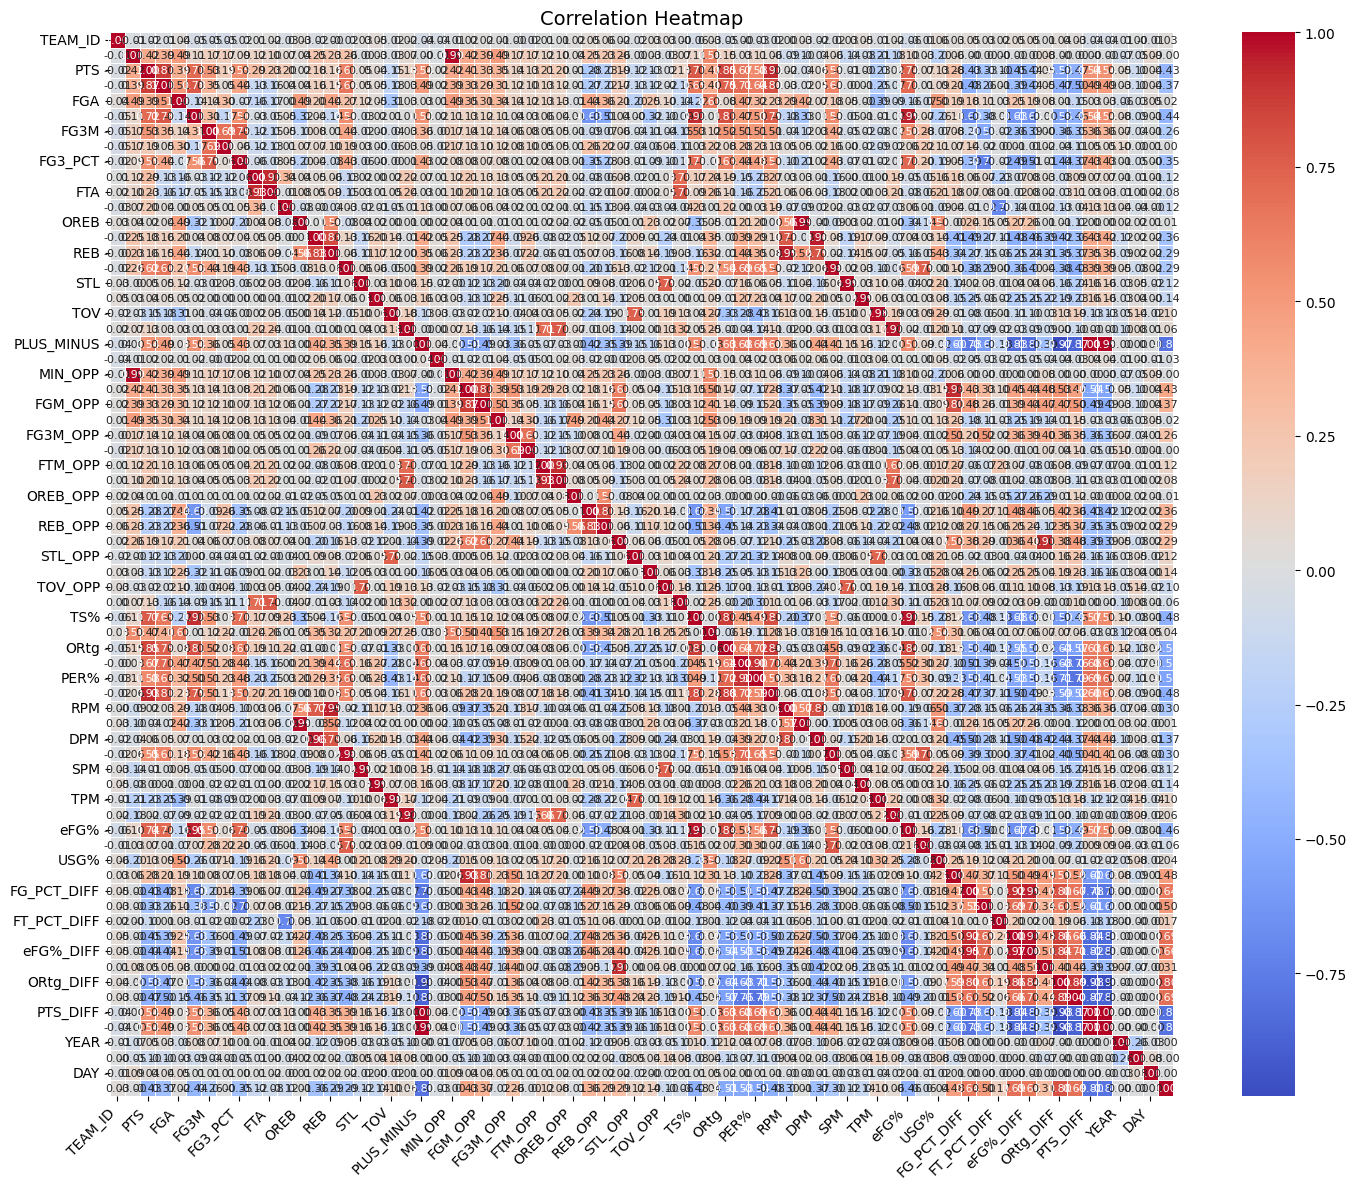

27520    10
27521   -10
27525     9
27526    -9
27488   -10
         ..
6        -2
17       -5
18        5
33       -8
34        8
Name: PTS_DIFF, Length: 13710, dtype: int64


In [6]:

#print('base_data = ',data.columns)
#print(data.head())
#stat addons list: PER, TS%, eFG%, 3PAr, FTr, ORB%, DRB%, TRB%, AST%, STL%, BLK%, TOV%, USG%, OWS, DWS, WS, WS/48, OBPM, DBPM, BPM, VORP
#adding TS%= PTS / (2 * (FGA + 0.44 * FTA))
data['TS%'] = data['PTS'] / (2 * (data['FGA'] + 0.44 * data['FTA']))



#**OFF Rating add
# Calculate offensive and defensive possessions
data['Offensive_Possessions'] = data['FGA'] + 0.44 * data['FTA'] + data['TOV'] - data['OREB']
#data['Defensive_Possessions'] = data['Opponent_FGA'] + 0.44 * data['Opponent_FTA'] + data['Opponent_TOV'] - data['Opponent_OREB']

# Calculate Offensive Rating and Defensive Rating
data['ORtg'] = (data['PTS'] / data['Offensive_Possessions']) * 100
#data['DRtg'] = (data['Points_Allowed'] / data['Defensive_Possessions']) * 100

#adding PER% = (PTS + REB + AST + STL + BLK - FGM - FTM - TOV) / MIN
data['PER'] = (data['PTS'] + data['REB'] + data['AST'] + data['STL'] + data['BLK'] -
             data['FGM'] - data['FTM'] - data['TOV'])/ data['MIN']
#standardized to 48 minutes
#data['PER%'] = (data['PER'] / data['MIN']) * 48

#adding PER% = (PTS + REB + AST + STL + BLK - FGM - FTM - TOV) / OP
data['PER%'] = ((data['PTS'] + data['REB'] + data['AST'] + data['STL'] + data['BLK'] -
             data['FGM'] - data['FTM'] - data['TOV']) / data['Offensive_Possessions']) * 100

# add per min function
def per_min(col):
    # Create a new column name based on the input column's name
    column_pm = col.name[0] + 'PM'
    
    # Set the new column's values to the per-minute values of the input column
    data[column_pm] = col / data['MIN']

#add points per minute  
data['PTS_PER_MIN'] = data['PTS'] / data['MIN']

#adding rebounds per minute
#data['RPM'] = data['REB'] / data['MIN']
per_min(data['REB'])
per_min(data['OREB'])
per_min(data['DREB'])

#adding assists per minute
#data['APM'] = data['AST'] / data['MIN']
per_min(data['AST'])

#adding steals per minute
#data['SPM'] = data['STL'] / data['MIN']
per_min(data['STL'])

#adding blocks per minute
#data['BPM'] = data['BLK'] / data['MIN']
per_min(data['BLK'])

#adding turnovers per minute
#data['TPM'] = data['TOV'] / data['MIN']
per_min(data['TOV'])

#adding fouls per minute
#data['FPM'] = data['PF'] / data['MIN']
per_min(data['PF'])

#adding eFG%
data['eFG%'] = (data['FGM'] + 0.5 * data['FG3M']) / data['FGA']

#adding AST%
data['AST%'] = data['AST'] / data['FGM']

#adding USG%
data['USG%'] = (data['FGA'] + 0.44 * data['FTA'] + data['TOV']) / data['MIN']
#add all the percentages to the list of columns

#_OPP stats:
data['PTS_PER_MIN_OPP'] = data['PTS_OPP'] / data['MIN_OPP']
# Calculate FG, FG3, and FT percentages
data['FG_PCT_OPP'] = data['FGM_OPP'] / data['FGA_OPP']
data['FG3_PCT_OPP'] = data['FG3M_OPP'] / data['FG3A_OPP']
data['FT_PCT_OPP'] = data['FTM_OPP'] / data['FTA_OPP']

# Calculate additional stats
data['TS%_OPP'] = data['PTS_OPP'] / (2 * (data['FGA_OPP'] + 0.44 * data['FTA_OPP']))
data['eFG%_OPP'] = (data['FGM_OPP'] + 0.5 * data['FG3M_OPP']) / data['FGA_OPP']
data['AST%_OPP'] = (data['AST_OPP'] / data['FGA_OPP']) * 100

# Calculate Defensive possessions _OPP
data['Defensive_Possessions'] = (data['FGA_OPP'] - data['OREB_OPP']) + data['TOV_OPP'] + (0.44 * data['FTA_OPP'])

# Calculate Defensive Rating (DRtg)
data['DRtg'] = (data['PTS_OPP'] / data['Defensive_Possessions']) * 100

data['DPER%'] = ((data['PTS_OPP'] + data['REB_OPP'] + data['AST_OPP'] + data['STL_OPP'] + data['BLK_OPP'] -
                        data['FGM_OPP'] - data['FTM_OPP'] - data['TOV_OPP']) / data['Defensive_Possessions']) * 100

#difference between team and _opp stats
data['FG_PCT_DIFF'] = data['FG_PCT_OPP'] - data['FG_PCT']
data['FG3_PCT_DIFF'] = data['FG3_PCT_OPP'] - data['FG3_PCT']
data['FT_PCT_DIFF'] = data['FT_PCT_OPP'] - data['FT_PCT']
data['TS%_DIFF'] = data['TS%_OPP'] - data['TS%']
data['eFG%_DIFF'] = data['eFG%_OPP'] - data['eFG%']
data['AST%_DIFF'] = data['AST%_OPP'] - data['AST%']
data['ORtg_DIFF'] = data['DRtg'] - data['ORtg']
data['PER%_DIFF'] = data['DPER%'] - data['PER%']
data['PTS_DIFF'] = data['PTS'] - data['PTS_OPP']
data['PTS_PER_MIN_DIFF'] = data['PTS_PER_MIN'] - data['PTS_PER_MIN_OPP']

#drop all _opp stats
data = data.drop(columns=['FG_PCT_OPP', 'FG3_PCT_OPP', 'FT_PCT_OPP', 'TS%_OPP', 'eFG%_OPP', 'AST%_OPP', 'Defensive_Possessions',
                            'DRtg', 'DPER%', 'PLUS_MINUS_OPP'])

#***PRE PROCESSING***
#*Date transformations
# Convert the date column to datetime format
data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Extract numerical features from the date column
data['YEAR'] = data['GAME_DATE'].dt.year
data['MONTH'] = data['GAME_DATE'].dt.month
data['DAY'] = data['GAME_DATE'].dt.day


#**Drop Missing values
# Drop rows with missing values
data_encoded = data.dropna()

# Filter the data to include only selected columns
#data_encoded_selected = data_encoded.iloc[:, :40]

# Check if the 2022-2023 NBA season is in the data. previous year was released on 8/17, see if in data then
has_23_24_schedule = any(data_encoded['SEASON_ID'] == 42023)
print('has_23_24_schedule = ',has_23_24_schedule)


# Filter the data for the 2022-2023 NBA season - changing to 1979-2023
#could also use season_id = 42022
start_date = pd.to_datetime('1979-10-01')
end_date = pd.to_datetime('2024-06-30')
season_data = data_encoded[(data_encoded['GAME_DATE'] >= start_date) & (data_encoded['GAME_DATE'] <= end_date)].copy()

#sort season_data by game_id and game_date
#proof that the dataset is team stats per game and not combined team stats per game
season_data = season_data.sort_values(by=['GAME_DATE','GAME_ID'])


# Encode 'WL' column as 1 for 'W' (win) and 0 for 'L' (loss)
season_data['WL_encoded'] = season_data['WL'].apply(lambda x: 1 if x == 'W' else 0)
season_data['WL_encoded'] = season_data['WL_OPP'].apply(lambda x: 1 if x == 'W' else 0)
print(season_data)



# Reorder the columns in the DataFrame to place 'WL_encoded' at the end
season_data = season_data[[col for col in season_data.columns if col != 'WL'] + ['WL']]

# Create a correlation matrix for the selected columns
correlation_matrix = season_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True,
            annot_kws={'size': 8}, linewidths=.5)  # Adjust the font size of annotations

plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels for better visibility
plt.yticks(rotation=0, fontsize=10)  # Adjust the y labels font size for clarity
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()  # Adjust the layout to fit the labels better
plt.show()


#In this code, we reorder the columns of season_data so that the target variable 'WL_encoded' is at the end. 
# Then, we calculate the correlation matrix using season_data.corr() and plot the heatmap using sns.heatmap(). 
# The heatmap will show the correlation values between different variables, with positive correlations in warmer colors and negative 
# correlations in cooler colors. The annot=True parameter shows the actual correlation values on the heatmap, and fmt='.2f' formats 
# the numbers to two decimal places. The cmap='coolwarm' parameter sets the color scheme for the heatmap.

print(season_data['PTS_DIFF'])

In [7]:
# Find out which columns have NaN values and the number of NaN values in each column
nan_values = data.isnull().sum()
nan_columns_before = nan_values[nan_values > 0]

print("Columns with NaN values and their counts before dropping:")
print(nan_columns_before)

# Drop columns with NaN values
data = data.dropna(axis=1)

# Check NaN columns again after dropping
nan_values_after = data.isnull().sum()
nan_columns_after = nan_values_after[nan_values_after > 0]

print("\nColumns with NaN values and their counts after dropping:")
print(nan_columns_after)


Columns with NaN values and their counts before dropping:
WL                  13
FG_PCT               3
FG3_PCT              5
FT_PCT               7
WL_OPP              13
TS%                  3
ORtg                 2
PER                  2
PER%                 2
PTS_PER_MIN          2
RPM                  2
OPM                  2
DPM                  2
APM                  2
SPM                  2
BPM                  2
TPM                  2
PPM                  2
eFG%                 3
AST%                 3
USG%                 2
PTS_PER_MIN_OPP      2
FG_PCT_DIFF          6
FG3_PCT_DIFF        10
FT_PCT_DIFF         14
TS%_DIFF             6
eFG%_DIFF            6
AST%_DIFF            5
ORtg_DIFF            4
PER%_DIFF            4
PTS_PER_MIN_DIFF     4
dtype: int64

Columns with NaN values and their counts after dropping:
Series([], dtype: int64)


In [9]:
#sort season_data by team_id and game_date
season_data = season_data.sort_values(by=[ "GAME_DATE"], ascending=[ False]).reset_index(drop=True)
print(season_data.head())

#filter data for just the start_date = pd.to_datetime('1979-10-01') end_date = pd.to_datetime('2024-06-30')
#last_to_curr_season_data = season_data[season_data.GAME_DATE <= '2023-06-30']
#last_to_curr_season_data = season_data[season_data.GAME_DATE >= '2022-10-01']

# Save the data to a CSV file
#season_data.to_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\nba_prepreprocess_data.csv', index=False)

#filter data for just the start_date = pd.to_datetime('1979-10-01') end_date = pd.to_datetime('2024-06-30')
#three_pt_era_data = season_data[season_data.GAME_DATE <= '2023-06-30']
#three_pt_era_data = season_data[season_data.GAME_DATE >= '1979-10-01']

# Save the data to a CSV file
season_data.to_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\nba_threeptera_prepreprocess_data.csv', index=False)


#print(three_pt_era_data.columns)


  SEASON_ID     TEAM_ID TEAM_ABBREVIATION         TEAM_NAME     GAME_ID  \
0     22023  1610612737               ATL     Atlanta Hawks  0022300079   
1     22023  1610612741               CHI     Chicago Bulls  0022300082   
2     22023  1610612762               UTA         Utah Jazz  0022300085   
3     22023  1610612751               BKN     Brooklyn Nets  0022300084   
4     22023  1610612742               DAL  Dallas Mavericks  0022300084   

   GAME_DATE      MATCHUP  MIN  PTS  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  \
0 2023-10-27  ATL vs. NYK  240  120   42   87   0.483    12    32    0.375   
1 2023-10-27  CHI vs. TOR  264  104   37   99   0.374     8    39    0.205   
2 2023-10-27  UTA vs. LAC  241  120   42   96   0.438    16    41    0.390   
3 2023-10-27    BKN @ DAL  238  120   45   92   0.489    21    43    0.488   
4 2023-10-27  DAL vs. BKN  240  125   44   91   0.484    15    36    0.417   

   FTM  FTA  FT_PCT  OREB  DREB  REB  AST  STL  BLK  TOV  PF  PLUS_MINUS  \
0   